# MNIST with feed forward Neural Network

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import numpy as np

## Review: What is pytorch?

PyTorch is a popular framework for deep learning.

PyTorch consists of 4 main packages:

* torch: a general purpose array library similar to Numpy that can do computations on GPU when the tensor type is cast to (torch.cuda.TensorFloat)
* torch.autograd: a package for building a computational graph and automatically obtaining gradients
* torch.nn: a neural net library with common layers and cost functions
* torch.optim: an optimization package with common optimization algorithms like SGD,Adam, etc


## Getting the data
Here we load the dataset. In the future we will create our own datasets but MNIST dataset is part of Pytorch.

In [2]:
train_ds = datasets.MNIST('../data', train=True, download=True, 
                       transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
test_ds = datasets.MNIST('../data', train=False, download=True, 
                       transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

### Dataset

A dataset in Pytorch is a  subclass of ```torch.utils.data.Dataset```  thas has methods ```__getitem__``` and ```__len__``` methods implemented. 

In [3]:
# has length
len(train_ds)

60000

In [6]:
# you can index any element
train_ds[0]

(
 (0 ,.,.) = 
 
 Columns 0 to 8 
   -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.0424
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242  0.1995  2.6051
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.1951  2.3633
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242  0.5940
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242
  -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242 -0.4242
  -

In [10]:
# train_ds[0] is a tuple with an image (x) and a class (y)
x, y = train_ds[0]
print(x.shape)

torch.Size([1, 28, 28])


In [9]:
print(y)

5


### Data loader
Data loader combines a dataset and a sampler, and provides an iterator over the dataset. The data loader divides the data in mini batches. This is particularly important when working with large dataset that cannot be hold in memory. 

In [12]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False) # for test we use shuffle=False

## Looking at examples

In [13]:
train_dl = iter(train_loader)
x, y = next(train_dl)

In [14]:
print(x.shape, y.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [15]:
def show(img, title=None):
    plt.imshow(img, interpolation='none', cmap="gray")
    if title is not None: plt.title(title)

In [16]:
# first from torch to numpy
X = x.numpy(); Y = y.numpy()
X.shape

(64, 1, 28, 28)

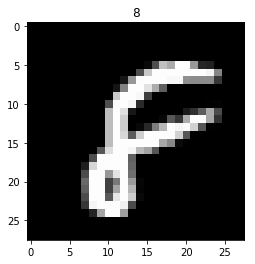

In [19]:
show(X[0][0], Y[0])

## torch.nn module
a neural net library with common layers and cost functions

### Linear layer

In [9]:
# linear transformation of a Nx5 matrix into a Nx3 matrix, where N can be anything
D = 5 # number of input featutes
M = 3 # neurons in the first hidden layer
linear_map = nn.Linear(D, M)

In [10]:
# parameters are initialized randomly
[p for p in linear_map.parameters()]

[Parameter containing:
  0.3818 -0.4302 -0.4161  0.3176  0.0683
  0.0464  0.0697 -0.2805  0.1885 -0.0439
 -0.2053  0.0112  0.2437  0.1981  0.2265
 [torch.FloatTensor of size 3x5], Parameter containing:
  0.1039
  0.3674
  0.4132
 [torch.FloatTensor of size 3]]

In [11]:
# random tensor
# think about A as a dataset with 10 points and 5 features
# the linear map with transform 
N = 10 
A = Variable(torch.randn(N, D)) # In future versions of pytorch `Variable` would not be necessary
A

Variable containing:
-2.0712 -0.3075 -0.0283 -0.6889  0.1833
 1.5569  0.3716 -0.0614  1.7085 -1.7961
-0.1991 -0.1137 -0.8812  1.0450 -0.8976
 0.7874 -0.9994  1.9837  1.5629 -0.0603
 0.6944 -0.8675 -1.2912 -1.0709 -1.1637
-0.7981 -0.2982  0.8684  0.3303 -0.1808
 2.4560  1.0767 -1.9960  1.1347  1.3043
-1.4543 -1.0590  0.4774 -1.6150  1.5099
-1.5020  0.5714  0.9445 -0.7971  1.4647
 0.1477 -1.4358  1.2585  0.2768  0.0726
[torch.FloatTensor of size 10x5]

In [12]:
linear_map(A)

Variable containing:
-0.7492  0.1200  0.7330
 0.9839  0.8837  0.0146
 0.7140  0.8339  0.2418
 0.5012  0.0752  1.0198
 0.8599  0.5506 -0.5295
-0.3414  0.1363  0.8098
 1.8586  1.2729 -0.0452
-0.6043 -0.2785  0.8381
-1.2617 -0.1420  1.1318
 0.3470 -0.0298  0.7448
[torch.FloatTensor of size 10x3]

## Creating models 
There are two ways of define a model in Pytorch. 

### nn.Sequential
To create a model with nn.Sequential you provide a list of layers. For example, the following model defines a 2-layer neural network with 784 input features ($D = 784$), 300 hidden layers ($M=300$) and 10 outputs. This model uses Relu activation funtion and no final activation.

In [15]:
net = nn.Sequential(nn.Linear(784, 300),
                    nn.ReLU(),
                    nn.Linear(300, 10))

### nn.Module
A more flexible way to define models in pytorch is as a subclass of nn.Module. At the ```__init__``` method we define all layers that will be used later. In the forward method, we should propose steps how we want to use already defined layers. Here is the same example. 

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(784, 300)
        self.linear2 = nn.Linear(300, 10)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

net = Net()

## References

* https://hsaghir.github.io/data_science/pytorch_starter/